In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [7]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [9]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

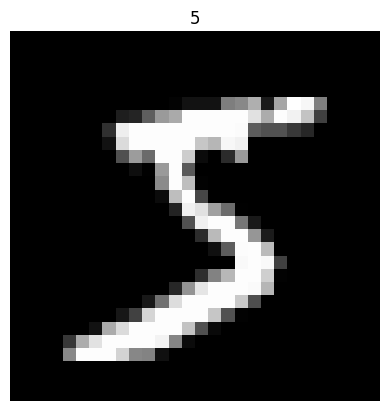

In [15]:
plt.imshow(x_train[0],cmap='gray')
plt.title(str(y_train[0]))
plt.axis('off')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

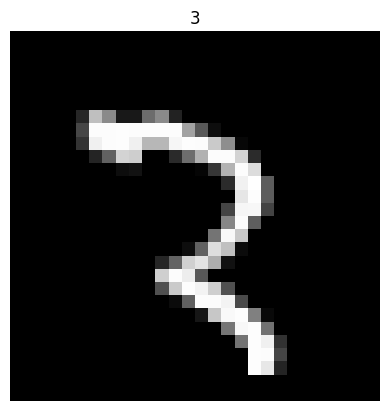

In [22]:
plt.imshow(x_train[500],cmap='gray')
plt.title(str(y_train[500]))
plt.axis('off')

In [19]:
x_train[0].shape

(28, 28)

In [20]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [21]:
x_train = x_train/255.0
x_test = x_test/255.0

In [38]:
model1 = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model1.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

model1.summary()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,250 (211.91 KB)

 Trainable params: 54,250 (211.91 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model1.fit(
    x_train,
    y_train,
    epochs = 5,
    batch_size = 32,
    validation_split = 0.1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.8551 - loss: 0.5095 - val_accuracy: 0.9715 - val_loss: 0.1198
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9652 - loss: 0.1278 - val_accuracy: 0.9775 - val_loss: 0.0844
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9751 - loss: 0.0867 - val_accuracy: 0.9813 - val_loss: 0.0706
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9812 - loss: 0.0691 - val_accuracy: 0.9803 - val_loss: 0.0708
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9834 - loss: 0.0571 - val_accuracy: 0.9813 - val_loss: 0.0684


In [29]:
predictions = model1.predict(x_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[1.2550584e-07, 2.6953659e-09, 8.2547427e-07, ..., 9.9994981e-01,
        1.1939176e-07, 2.5026386e-05],
       [4.2088477e-06, 5.4868633e-05, 9.9966347e-01, ..., 3.4437964e-13,
        7.7686209e-06, 8.2625728e-10],
       [2.0239149e-04, 9.9873775e-01, 2.5759244e-04, ..., 1.0662892e-04,
        4.5800261e-05, 5.4504056e-07],
       ...,
       [4.6467690e-08, 2.3270246e-08, 6.3330532e-08, ..., 7.0358720e-04,
        3.1343868e-04, 1.3082409e-03],
       [9.3074920e-07, 5.1922274e-08, 4.2477285e-07, ..., 4.8867161e-08,
        9.0314345e-03, 3.6046652e-06],
       [1.6537768e-07, 7.0998060e-12, 1.6749049e-06, ..., 2.5499491e-11,
        2.4136577e-08, 1.1722766e-10]], dtype=float32)

In [32]:
prediction_class = np.argmax(predictions, axis=1)

In [40]:
prediction_class

array([7, 2, 1, ..., 4, 5, 6])

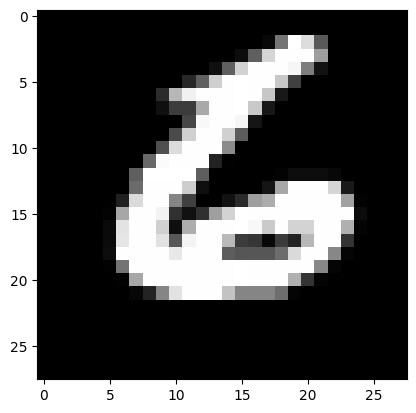

In [35]:
plt.imshow(x_test[9999],cmap='gray')

In [39]:
pred = model1.predict(x_test[0].reshape(1, 28, 28, 1))
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
[[0.10121981 0.09724886 0.1091079  0.11583526 0.09288835 0.0946757
  0.10378391 0.08729801 0.0895412  0.108401  ]]
